In [ ]:
import numpy as np
import matplotlib.pyplot as plt; plt.rcParams['text.usetex'] = True
from fun_gilles import *

In [2]:
def xyeq_vs_c(initial_c, initial_food,method, n_iterations, 
              reactions, food_molecules, k, V, k_var):
    equilibrium = np.zeros((len(initial_c)))
    colors = plt.cm.Spectral(np.linspace(0, 1, len(k_var)))

    for j in range(len(k_var)):
        k[1] = k_var[j] 
        
        for i in range(len(initial_c)):
            initial_food[0] = initial_c[i]
            abundances, times = chemistry(method, n_iterations, reactions, 
                                        food_molecules, initial_food, k, V)
            equilibrium[i] = abundances[-1, -1]
        
        plt.plot(initial_c, equilibrium, label="$k_{ar}$"+f"={k_var[j]:.1e}",
                color=colors[j], alpha=0.8)
            

    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xlabel("$C_0$")
    plt.ylabel("$XY_{eq}$")

    plt.legend()
        
    plt.show()

In [6]:
file = "reactions_XYC.txt" # M reactions
method = "Deterministic" # Gillespie or Deterministic

# condiciones iniciales
food_molecules = 3

# obtener reacciones y especies:
reactions = read_file(file)
species = obtain_species(reactions)

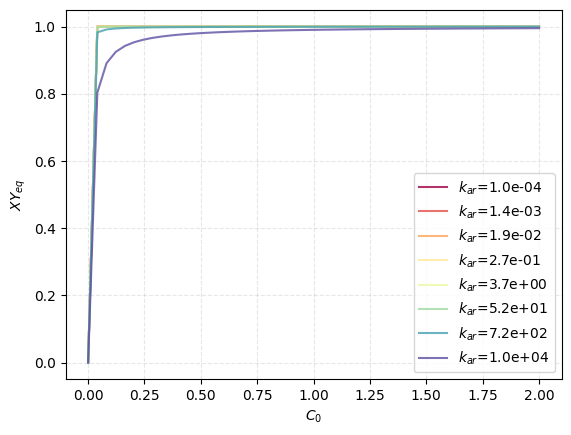

In [7]:
# Reaction constants:
k = [1,0,1,0] # len(k)= # de reacciones
# Volume:
V = 1
initial_food = [0,1,1] # initial molecules number
initial_c = (np.linspace(0,2,50))
k_var = np.logspace(-4, 4, 8)
n_iterations = 1000000

xyeq_vs_c(initial_c, initial_food, method, n_iterations, reactions,
          food_molecules, k, V, k_var)

array([1. , 1.5, 2. , 2.5])